In [14]:

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


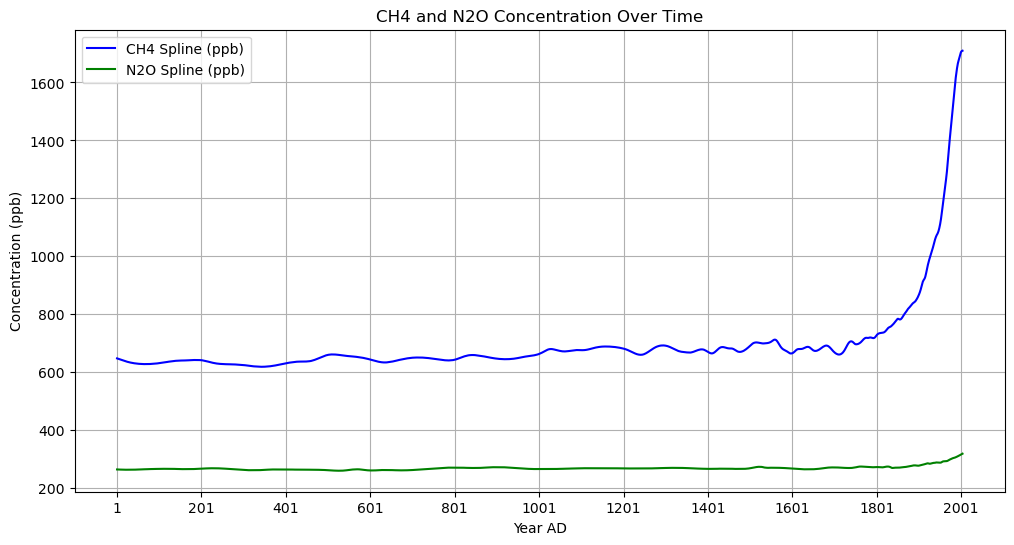

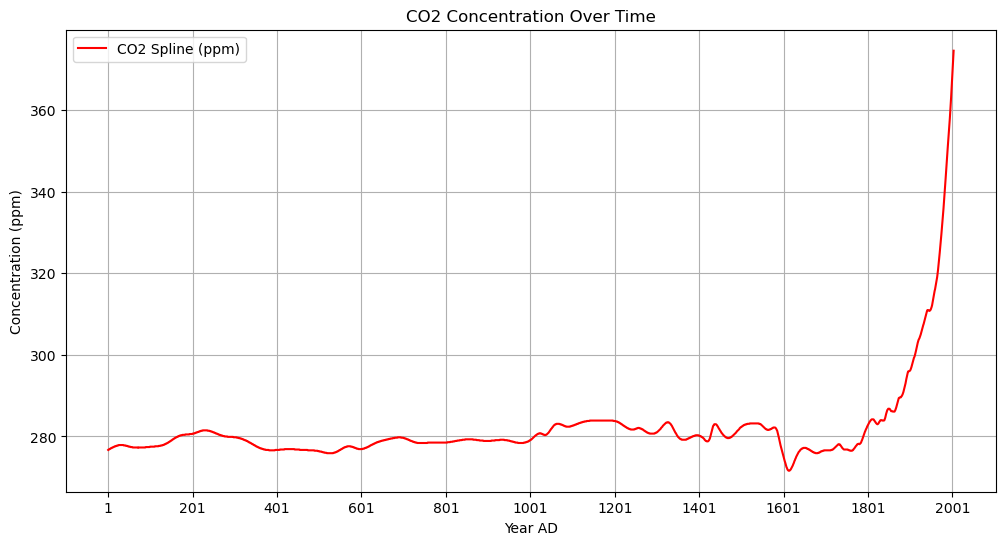

In [22]:
# CO2, CH4, N2O gases historical data from Antarctic ice
# https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=noaa-icecore-9959
# 2000 years of data
# plot the data

antarctic_ice_path = r'../datasets/CO2_climategov/law2006_spline.csv'


antarctic_df = pd.read_csv(antarctic_ice_path, header=3)

# Extracting necessary columns
antarctic_data = antarctic_df[['Year AD', 'CH4 Spline (ppb)', 'N2O Spline (ppb)', 'CO2 Spline (ppm)']]
antarctic_data.columns = ['year', 'ch4', 'n2o', 'co2']

# Creating the first plot for CH4 and N2O
plt.figure(figsize=(12, 6))
plt.plot(antarctic_data['year'], antarctic_data['ch4'], label='CH4 Spline (ppb)', color='blue')
plt.plot(antarctic_data['year'], antarctic_data['n2o'], label='N2O Spline (ppb)', color='green')
plt.xlabel('Year AD')
plt.ylabel('Concentration (ppb)')
plt.title('CH4 and N2O Concentration Over Time')
plt.xticks(ticks=range(int(min(antarctic_data['year'])), int(max(antarctic_data['year']))+1, 200))
plt.legend()
plt.grid(True)
plt.show()

# Creating the second plot for CO2
plt.figure(figsize=(12, 6))
plt.plot(antarctic_data['year'], antarctic_data['co2'], label='CO2 Spline (ppm)', color='red')
plt.xlabel('Year AD')
plt.ylabel('Concentration (ppm)')
plt.title('CO2 Concentration Over Time')
plt.xticks(ticks=range(int(min(antarctic_data['year'])), int(max(antarctic_data['year']))+1, 200))
plt.legend()
plt.grid(True)
plt.show()

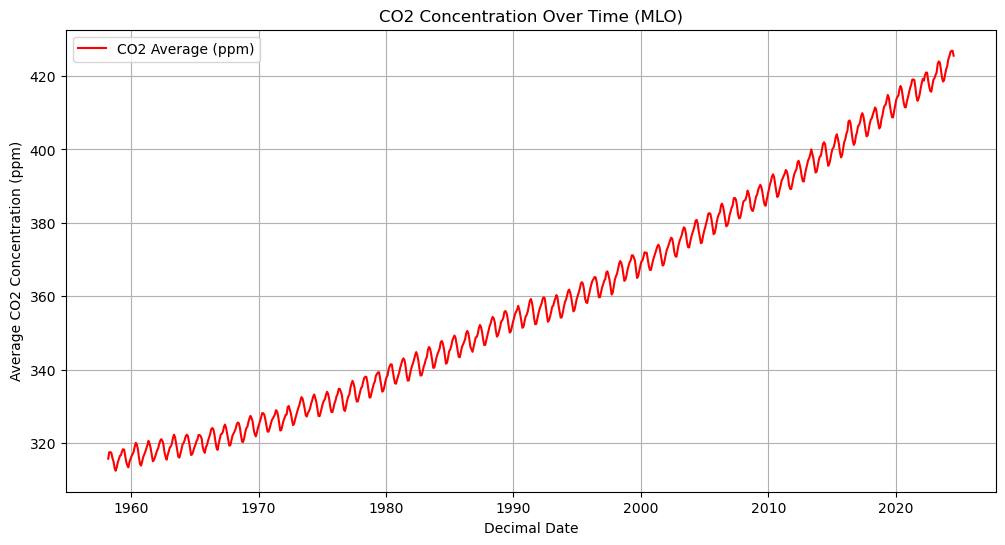

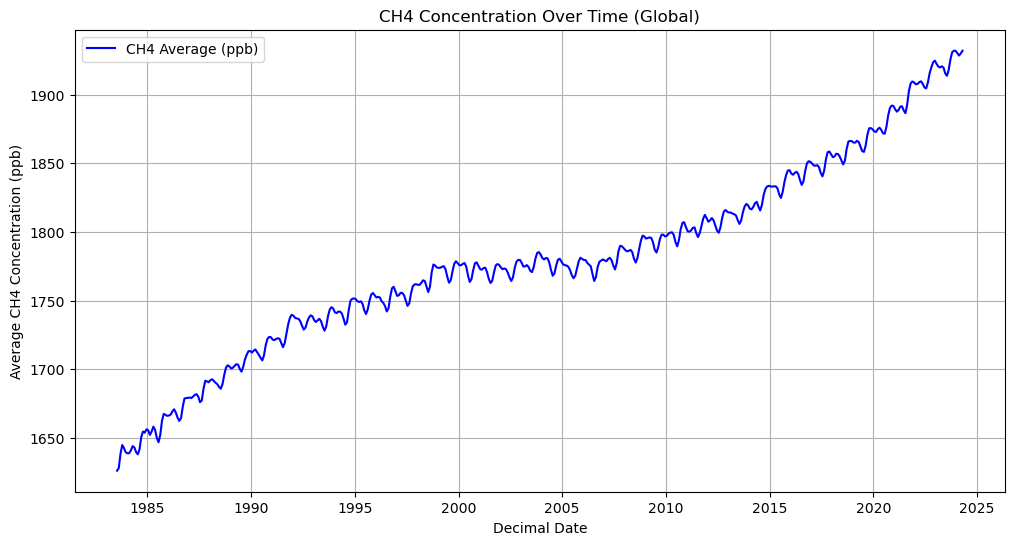

In [24]:
# NOAA GML DATA CO2 CH4 N2O
# https://gml.noaa.gov/ccgg/trends/data.html
# 1958 - now

noaa_co2_path = r'../datasets/CO2_climategov/co2_mm_mlo.csv'
noaa_ch4_path = r'../datasets/CO2_climategov/ch4_mm_gl.csv'


noaa_co2_df = pd.read_csv(noaa_co2_path, header=40)
noaa_co2 = noaa_co2_df[['decimal date', 'average']].rename(columns={'decimal date': 'decimal'})

# Reading the CH4 dataset with header on the 46th row (index 45)
noaa_ch4_df = pd.read_csv(noaa_ch4_path, header=45)
noaa_ch4 = noaa_ch4_df[['decimal', 'average']]



# Creating the plot for CO2
plt.figure(figsize=(12, 6))
plt.plot( noaa_co2['decimal'], noaa_co2['average'] , label='CO2 Average (ppm)', color='red')
plt.xlabel('Decimal Date')
plt.ylabel('Average CO2 Concentration (ppm)')
plt.title('CO2 Concentration Over Time (MLO)')
plt.grid(True)
plt.legend()
plt.show()

# Creating the plot for CH4
plt.figure(figsize=(12, 6))
plt.plot(noaa_ch4['decimal'], noaa_ch4['average'], label='CH4 Average (ppb)', color='blue')
plt.xlabel('Decimal Date')
plt.ylabel('Average CH4 Concentration (ppb)')
plt.title('CH4 Concentration Over Time (Global)')
plt.grid(True)
plt.legend()
plt.show()

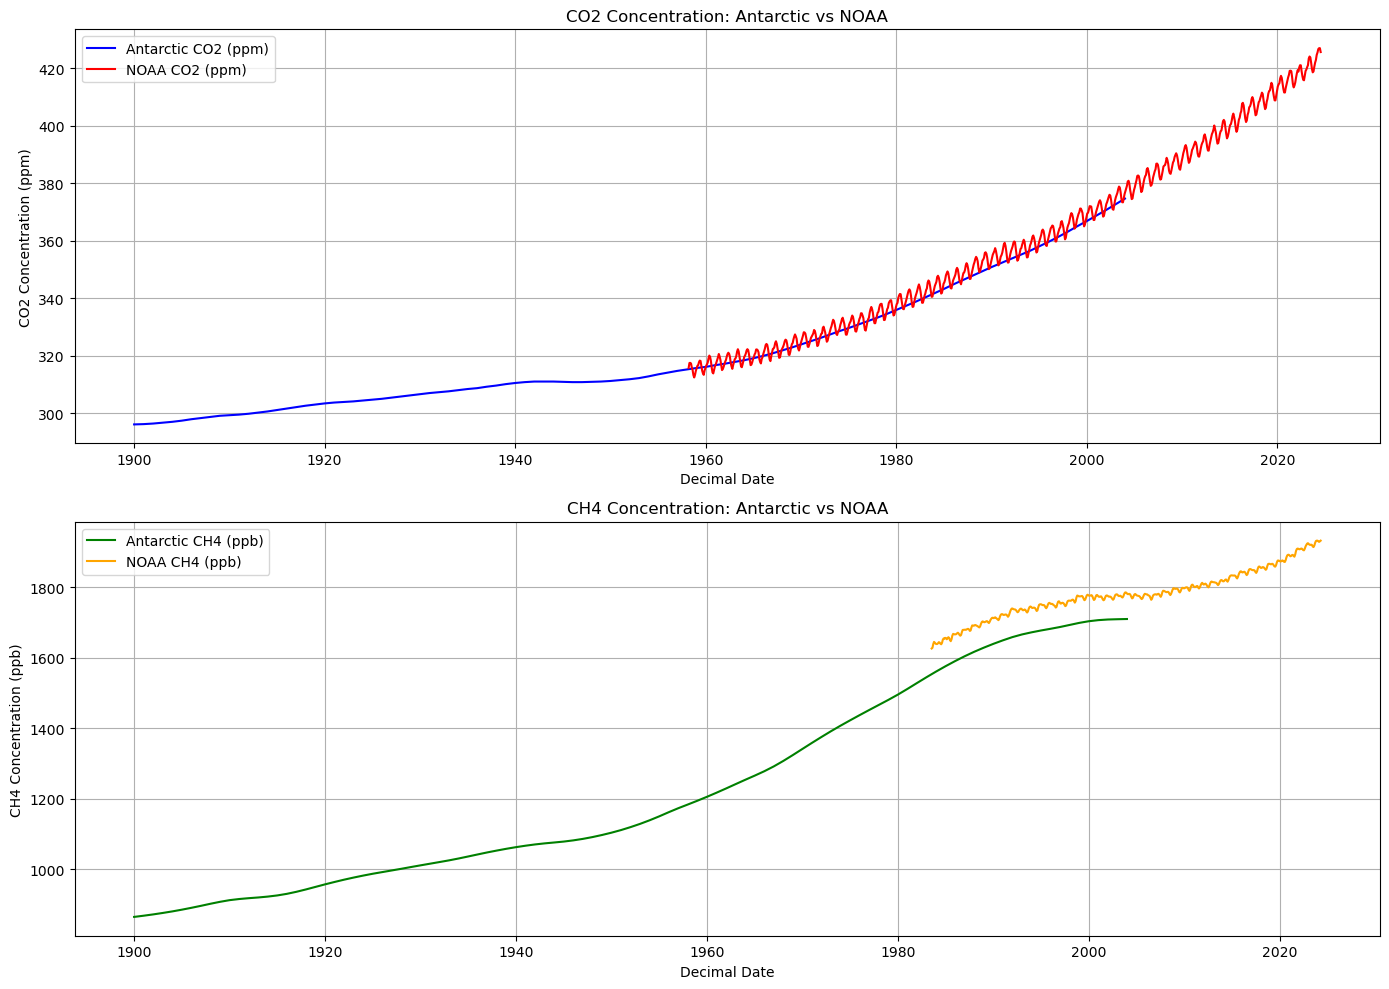

In [25]:

#cut both datasets to the same time period, 1900 - latest year


antarctic_data = antarctic_data[antarctic_data['year'] >= 1900]
noaa_co2 = noaa_co2[noaa_co2['decimal'] >= 1900]
noaa_ch4 = noaa_ch4[noaa_ch4['decimal'] >= 1900]



# Create a figure with two subplots: one for CO2 and one for CH4
plt.figure(figsize=(14, 10))

# CO2 Plot
plt.subplot(2, 1, 1)
plt.plot(antarctic_data['year'], antarctic_data['co2'], label='Antarctic CO2 (ppm)', color='blue')
plt.plot(noaa_co2['decimal'], noaa_co2['average'], label='NOAA CO2 (ppm)', color='red')
plt.xlabel('Decimal Date')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('CO2 Concentration: Antarctic vs NOAA')
plt.legend()
plt.grid(True)

# CH4 Plot
plt.subplot(2, 1, 2)
plt.plot(antarctic_data['year'], antarctic_data['ch4'], label='Antarctic CH4 (ppb)', color='green')
plt.plot(noaa_ch4['decimal'], noaa_ch4['average'], label='NOAA CH4 (ppb)', color='orange')
plt.xlabel('Decimal Date')
plt.ylabel('CH4 Concentration (ppb)')
plt.title('CH4 Concentration: Antarctic vs NOAA')
plt.legend()
plt.grid(True)

# Show the combined plots
plt.tight_layout()
plt.show()